# TF Graphs

In [43]:
import numpy as np
import tensorflow as tf

In [44]:
np.random.seed(101)
tf.compat.v1.set_random_seed(101)

In [45]:
rand_a = np.random.uniform(0, 100, (5, 5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [46]:
rand_b = np.random.uniform(0, 100, (5, 1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [47]:
tf.compat.v1.disable_eager_execution()
a = tf.compat.v1.placeholder(tf.float32)


In [48]:
b = tf.compat.v1.placeholder(tf.float32)

In [49]:
add_op = a + b

In [50]:
mul_op = a * b

In [51]:
with tf.compat.v1.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a: 10, b: 20})
    print(add_result)

    add_result = sess.run(add_op, feed_dict={a: rand_a, b: rand_b})
    print(add_result)

    mul_result = sess.run(mul_op, feed_dict={a: rand_a, b: rand_b})
    print(mul_result)

30.0
[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Example Neural Network

In [52]:
n_features = 10
n_dense_neurons = 3



In [53]:
x = tf.compat.v1.placeholder(tf.float32, (None, n_features))

In [54]:
W = tf.Variable(tf.random.normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [55]:
xW = tf.matmul(x, W)

In [56]:
z = tf.add(xW, b)

In [57]:
a = tf.sigmoid(z)

In [58]:
init = tf.compat.v1.global_variables_initializer()

In [59]:
with tf.compat.v1.Session() as sess:
    sess.run(init)

    layer_out = sess.run(a, feed_dict={x: np.random.random([1, n_features])})

In [60]:
print(layer_out)

[[0.82677925 0.05480573 0.8088548 ]]


## Simple Regression Example 

In [61]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [62]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [63]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [64]:
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [65]:
import matplotlib.pyplot as plt

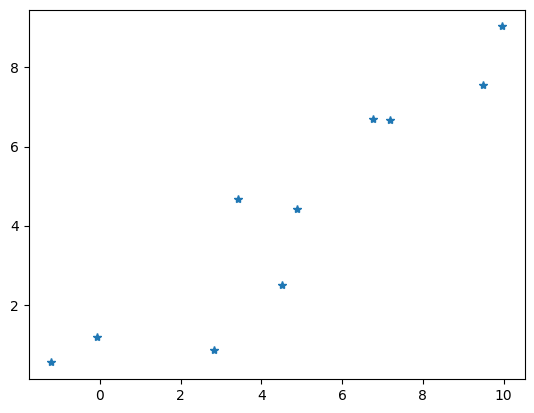

In [66]:
plt.plot(x_data, y_label, "*")

y = mx+b 

In [67]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [68]:
m = tf.Variable(0.81)
b = tf.Variable(0.67)

In [69]:
error = 0

for x,y in zip(x_data, y_label):
    y_hat = m*x + b

    error += (y-y_hat)**2

In [70]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [71]:
init = tf.compat.v1.global_variables_initializer()

In [72]:
with tf.compat.v1.Session() as sess:
    sess.run(init)

    training_steps = 100

    for i in range(training_steps):
        sess.run(train)

    final_slope, final_intercept = sess.run([m, b])

In [73]:
x_test = np.linspace(-1, 11, 10)

In [74]:
#y= mx + b
y_pred_plot = final_slope*x_test + final_intercept

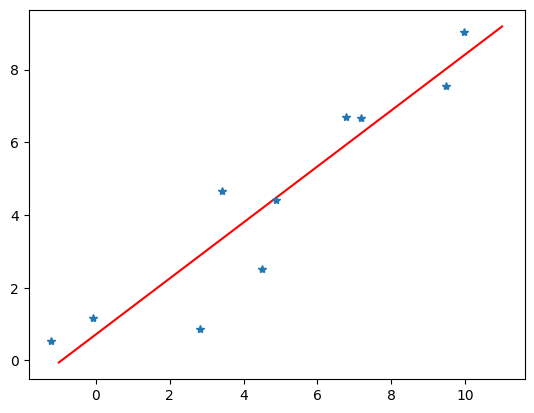

In [75]:
plt.plot(x_test, y_pred_plot,"r")
plt.plot(x_data, y_label,"*" )